In [33]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
from sklearn import preprocessing

filepath = r'C:\Users\13284\Desktop\国准数据面试题\数据.xlsx'
data = pd.read_excel(filepath)
#print(data.head())

m100=data["m100"]
m200=data["m200"].values/2
m400=data["m400"].values/4
m800=data["m800"].values*60/8
m1500=data["m1500"].values*60/15
m3000=data["m3000"].values*60/30
Marathon=data["Marathon"].values*60/421.95

cal_List=[m100,m200,m400,m800,m1500,m3000]
column_List=["m100","m200","m400","m800","m1500","m3000"]

# 计算列表两两间的相关系数
data_dict = {} # 创建数据字典，为生成Dataframe做准备
for col, gf_lst in zip(column_List, cal_List):
    data_dict[col] = gf_lst
unstrtf_df = pd.DataFrame(data_dict)
cor1 = unstrtf_df.corr() # 计算相关系数，得到一个矩阵
#print(cor1)

###主成分分析

X_scaler=pd.DataFrame(data_dict,columns=["m100","m200","m400","m800","m1500","m3000"])
#主成分分析建模
pca = PCA(n_components=4) #n_components提取因子数量
pca.fit(X_scaler)
print(pca.explained_variance_) #贡献方差，即特征根
print(pca.explained_variance_ratio_) #方差贡献率
print(pca.components_)  #成分得分系数矩阵

k1_spss=pca.components_/np.sqrt(pca.explained_variance_.reshape(4,1)
#因子得分
x_tf=pca.transform(X_scaler)
#因子得分标准化
scaler2=preprocessing.StandardScaler().fit(x_tf)
x_tf_scaler=pd.DataFrame(scaler2.transform(x_tf),columns=['FAC1','FAC2','FAC3','FAC4'])
print(x_tf_scaler)
#正负号转化
#如因子4的系数与SPSS的符号相反
k_sign=np.sign(k1_spss.sum(axis=1))
print(k_sign)
x_tf_scaler_sign=x_tf_scaler*k_sign #取正负号
#综合得分
rat=pca.explained_variance_ratio_
x_tf_scaler_sign['PE_score']=np.sum(x_tf_scaler_sign*rat,axis=1)
print(x_tf_scaler_sign['PE_score'])

[5.55540332 0.31938754 0.14306344 0.05505134]
[0.90975211 0.05230286 0.02342805 0.0090152 ]
[[ 0.15215518  0.18150011  0.24151027  0.31771736  0.55567282  0.68982802]
 [-0.37254858 -0.53024847 -0.56307104 -0.27991394  0.22720575  0.36472025]
 [ 0.38275144  0.44179081 -0.19627755 -0.66970035 -0.21779687  0.35194219]
 [ 0.23390836  0.23005936 -0.3636538  -0.10198244  0.70361671 -0.50461727]]
        FAC1      FAC2      FAC3      FAC4
0   0.377344  0.402400 -1.152404 -1.246482
1  -0.639101  1.039803  0.171101 -0.603874
2  -0.357804  1.099323  1.047456  0.101512
3  -0.663048  0.022871  0.004893  0.512509
4   0.505597  0.983773 -1.528779  0.822447
5   0.317060  1.179209 -0.607590  0.207934
6   0.368487 -1.245012 -0.749238  1.207152
7  -0.888100  0.936321 -0.570954 -0.196840
8  -0.065996 -1.202456  1.141034 -0.497720
9   0.018617 -1.163039  0.268781  0.742528
10  0.073930 -0.190834 -0.273253  0.348486
11  2.092682 -2.099022  1.341449 -1.414319
12  1.238817 -0.544577 -0.490786 -1.488618
13 -0

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets.samples_generator import make_blobs
 
X, y = make_blobs(n_samples=10000, n_features=6, centers=[m100,m200,m400,m800,m1500,m3000],
                  cluster_std=[0.2, 0.1, 0.2, 0.2], random_state=9)
 
# 降维到二维
pca = PCA(n_components=2)
pca.fit(X)
# 输出特征值
print(pca.explained_variance_)
#输出特征向量
print(pca.components_)
# 降维后的数据
X_new = pca.transform(X)
print(X_new)
fig = plt.figure()
plt.scatter(X_new[:, 0], X_new[:, 1], marker='o')
print(plt.show())

ValueError: Length of `clusters_std` not consistent with number of centers. Got centers = [[11.61   11.2    11.43   11.41   11.46   11.31   12.14   11.     12.
  11.95   11.6    12.9    11.96   11.09   11.42   11.79   11.13   11.15
  10.81   11.01   11.     11.79   11.84   11.45   11.95   11.85   11.43
  11.45   11.29   11.73   11.73   11.96   12.25   12.03   12.23   11.76
  11.89   11.25   11.55   11.58   12.25   11.76   11.13   11.81   11.44
  12.3    11.8    11.16   11.45   11.22   11.75   11.98   10.79   11.06
  12.74  ]
 [11.47   11.175  11.545  11.52   11.525  11.585  12.235  11.125  12.26
  12.205  12.     13.55   12.3    10.985  11.76   12.025  11.195  11.295
  10.855  11.195  11.065  12.04   12.27   11.53   12.14   12.12   11.755
  11.785  11.5    12.     11.94   12.245  12.89   12.48   12.105  12.54
  11.81   11.405  11.565  11.655  12.535  11.77   11.105  12.11   11.73
  12.5    11.99   11.41   11.655  11.31   12.23   12.22   10.915  11.095
  12.925 ]
 [13.625  12.77   12.655  13.     13.325  13.2    13.75   12.515  13.725
  13.7425 13.315  15.1    14.5625 11.9975 13.4    14.0125 12.535  12.9325
  12.04   12.4375 12.615  13.7325 14.0225 12.875  13.4    13.835  13.31
  13.725  13.0025 13.4325 13.175  13.925  12.8    14.025  13.7725 14.525
  13.44   13.095  12.9    13.28   14.24   13.65   12.3225 13.575  12.8
  13.77   13.3975 12.9475 13.2775 13.125  13.95   14.1125 12.655  12.2975
  14.6825]
 [16.125  14.85   14.925  15.     16.2    15.75   16.35   15.     15.375
  15.6    15.825  17.25   16.575  14.175  15.225  16.8    15.225  15.
  14.475  14.625  14.85   15.525  17.1    15.075  15.75   16.65   15.375
  15.75   14.7    15.675  15.     16.125  14.775  15.525  16.425  17.025
  15.3    14.925  15.15   15.225  16.8    16.425  14.625  15.675  14.4
  15.9    15.375  15.15   15.15   15.75   16.5    16.125  14.7    14.175
  17.475 ]
 [17.72   16.52   16.88   16.56   18.32   17.96   17.8    16.24   16.92
  17.32   17.4    19.36   18.72   16.56   16.72   18.96   16.4    16.56
  15.84   16.12   16.12   17.4    19.44   16.56   17.28   18.44   16.44
  17.     15.92   17.4    16.6    17.68   17.     17.52   18.76   19.16
  17.     16.24   16.72   16.04   19.36   18.4    15.96   16.64   15.84
  18.08   16.56   16.48   16.28   17.52   18.88   17.48   15.8    15.48
  23.24  ]
 [19.58   18.16   18.68   17.76   19.62   19.54   19.02   17.62   18.74
  18.62   18.92   22.2    20.86   17.84   17.42   19.78   17.84   17.96
  17.5    17.18   17.24   19.74   21.08   17.96   19.96   20.04   17.78
  18.74   17.26   18.4    18.4    19.24   18.7    19.28   20.92   21.8
  19.18   18.02   17.52   17.06   21.38   20.32   17.94   17.68   17.06
  19.88   18.04   17.68   17.54   19.26   20.56   18.76   17.     16.9
  26.08  ]] and cluster_std = [0.2, 0.1, 0.2, 0.2]

巴特利球形度检验
卡方值： 611.8646917316397 P值 2.4736885688177401e-116
KMO检验： 0.8329193812163849
相关矩阵特征值： [5.80568576 0.65364552 0.29988243 0.12547749 0.05381692 0.03904928
 0.0224426 ]


D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 30862 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 30707 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22270 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22240 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 23376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 22240 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\anaconda\lib\site-packages\

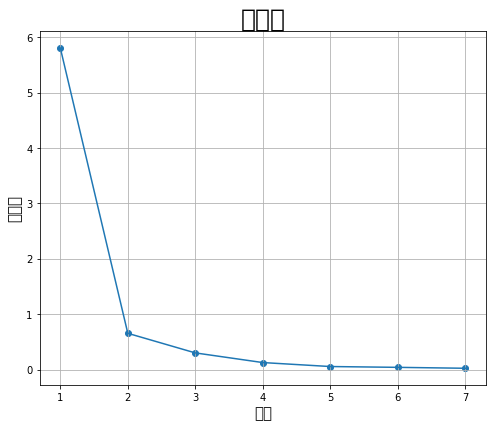

D:\anaconda\lib\site-packages\factor_analyzer\factor_analyzer.py:626: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn('No rotation will be performed when '


(array([5.80568576]), array([0.82938368]), array([0.82938368]))

各因子得分:
         fac1
0   0.220843
1  -0.876882
2  -0.578198
3  -0.632458
4   0.162437
5  -0.049591
6   0.704520
7  -1.092414
8   0.229458
9   0.268597
10  0.059297
11  2.545463
12  1.097062
13 -1.279081
14 -0.467593
15  0.961442
16 -0.913862
17 -0.792534
18 -1.468492
19 -1.225460
20 -1.165723
21  0.341046
22  1.351751
23 -0.618730
24  0.424938
25  0.884762
26 -0.468002
27 -0.059882
28 -0.896145
29 -0.024810
30 -0.180480
31  0.516802
32  0.193633
33  0.545235
34  0.980331
35  1.773344
36 -0.026589
37 -0.751594
38 -0.632990
39 -0.621158
40  1.667380
41  0.686992
42 -1.119206
43 -0.093941
44 -0.850191
45  0.825188
46 -0.148965
47 -0.765554
48 -0.564045
49 -0.209475
50  0.818087
51  0.673595
52 -1.397202
53 -1.451182
54  3.490221

方差贡献表:
      因子      方差贡献    累计方差贡献  累计方差贡献占比
0  fac1  0.829384  0.829384       1.0


,country,m100,m200,m400,m800,m1500,m3000,Marathon,fac1,factor_score,rank
0,Western Samoa,12.74,25.85,58.73,2.33,5.81,13.04,306.00,3.490221,3.490221,1
1,Cook Isiand,12.90,27.10,60.40,2.30,4.84,11.10,233.22,2.545463,2.545463,2
2,Mauritius,11.76,25.08,58.10,2.27,4.79,10.90,261.13,1.773344,1.773344,3
3,PNG,12.25,25.07,56.96,2.24,4.84,10.69,233.00,1.667380,1.667380,4
4,Guatemala,11.84,24.54,56.09,2.28,4.86,10.54,215.08,1.351751,1.351751,5
5,Costa Rica,11.96,24.60,58.25,2.21,4.68,10.43,171.80,1.097062,1.097062,6
6,Malaysia,12.23,24.21,55.09,2.19,4.69,10.46,182.17,0.980331,0.980331,7
7,Dominicap,11.79,24.05,56.05,2.24,4.74,9.89,203.88,0.961442,0.961442,8
8,Indonesia,11.85,24.24,55.34,2.22,4.61,10.02,201.28,0.884762,0.884762,9
9,Singapore,12.30,25.00,55.08,2.12,4.52,9.94,182.77,0.825188,0.825188,10


In [57]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
from sklearn import preprocessing

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

from factor_analyzer import FactorAnalyzer

filepath = r'C:\Users\13284\Desktop\国准数据面试题\数据.xlsx'
data = pd.read_excel(filepath)
#print(data.head())

m100=data["m100"]
m200=data["m200"].values/2
m400=data["m400"].values/4
m800=data["m800"].values*60/8
m1500=data["m1500"].values*60/15
m3000=data["m3000"].values*60/30
Marathon=data["Marathon"].values*60/421.95

cal_List=[m100,m200,m400,m800,m1500,m3000]
column_List=["m100","m200","m400","m800","m1500","m3000"]

print('巴特利球形度检验')
df_model = data.iloc[:,1:] #去掉第一列
chi_square_value,p_value=calculate_bartlett_sphericity(df_model)
print('卡方值：',chi_square_value,'P值', p_value)

#相关性检验kmo要大于0.6
kmo_all,kmo_model=calculate_kmo(df_model)
print('KMO检验：',kmo_model)

#查看相关矩阵特征值
fa = FactorAnalyzer(18, rotation='varimax',method='principal',impute='mean')
fa.fit(df_model)
ev, v = fa.get_eigenvalues()
print('相关矩阵特征值：',ev)
#Create scree plot using matplotlib
plt.figure(figsize=(8, 6.5))
plt.scatter(range(1,df_model.shape[1]+1),ev)
plt.plot(range(1,df_model.shape[1]+1),ev)
plt.title('碎石图',fontdict={'weight':'normal','size': 25})
plt.xlabel('因子',fontdict={'weight':'normal','size': 15})
plt.ylabel('特征值',fontdict={'weight':'normal','size': 15})
plt.grid()
# plt.savefig('E:/suishitu.jpg')
plt.show()

#确定因子个数
n_factors = sum(ev>2)

#取旋转后的结果
fa2 = FactorAnalyzer(n_factors,rotation='varimax',method='principal')
fa2.fit(df_model)
#给出贡献率
var = fa2.get_factor_variance()
print(var)
#计算因子得分
fa2_score = fa2.transform(df_model)

#得分表
column_list = ['fac'+str(i) for i in np.arange(n_factors)+1]
fa_score = pd.DataFrame(fa2_score,columns=column_list)
for col in fa_score.columns:
    data[col] = fa_score[col]
print("\n各因子得分:\n",fa_score)    

#方差贡献表
df_fv = pd.DataFrame()
df_fv['因子'] = column_list
df_fv['方差贡献'] = var[1]
df_fv['累计方差贡献'] = var[2]
df_fv['累计方差贡献占比'] = var[1]/var[1].sum()
print("\n方差贡献表:\n",df_fv)

data['factor_score'] = ((var[1]/var[1].sum())*fa2_score).sum(axis=1)
data = data.sort_values(by='factor_score',ascending=False).reset_index(drop=True)
data['rank'] = data.index+1
data.iloc[:,-20:]